In [2]:
# Define enhancement functions (as before)
def apply_white_balance(img):
    """Apply White Balance to the image using a simple scaling method."""
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

def apply_gray_world(img):
    """Apply Gray World Assumption for color constancy."""
    img = img.astype(np.float32)
    avgR = np.mean(img[:, :, 2])
    avgG = np.mean(img[:, :, 1])
    avgB = np.mean(img[:, :, 0])
    
    avgGray = (avgR + avgG + avgB) / 3
    
    img[:, :, 2] = np.minimum(img[:, :, 2] * (avgGray / avgR), 255)
    img[:, :, 1] = np.minimum(img[:, :, 1] * (avgGray / avgG), 255)
    img[:, :, 0] = np.minimum(img[:, :, 0] * (avgGray / avgB), 255)
    
    return img.astype(np.uint8)

def apply_clahe(img):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)."""
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [3]:
# Define Quality Metrics functions (as before)
def calculate_ssim(img1, img2):
    """Calculate the SSIM between two images."""
    grayA = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(grayA, grayB)

def calculate_psnr(img1, img2):
    """Calculate the PSNR between two images."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    return 20 * log10(255.0 / sqrt(mse))


In [4]:
# Load and process the dataset (modify paths accordingly)
input_dir = "/kaggle/input/uieb-dataset-raw/raw-890/"
output_dir = "/kaggle/working/enhanced_images/"

In [5]:
# Create subfolders for each image type
subfolders = ["wb_images", "gc_images", "clahe_images", "enhanced_images"]
for subfolder in subfolders:
    os.makedirs(os.path.join(output_dir, subfolder), exist_ok=True)

In [6]:
# List images in the dataset
images = os.listdir(input_dir)[:5]  # Load only 5 images for demonstration

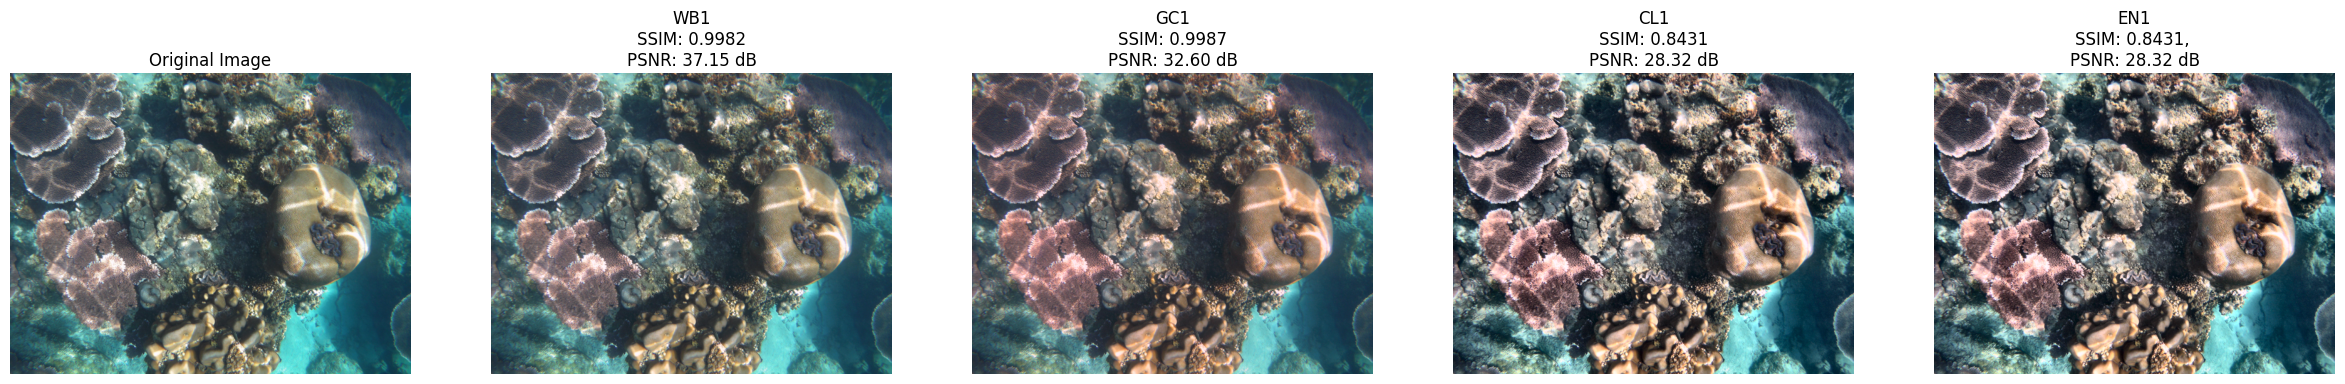

Results for 4_img_.png:
WB1 - SSIM: 0.9982, PSNR: 37.15 dB
GC1 - SSIM: 0.9987, PSNR: 32.60 dB
EN1 - SSIM: 0.8431, PSNR: 28.32 dB




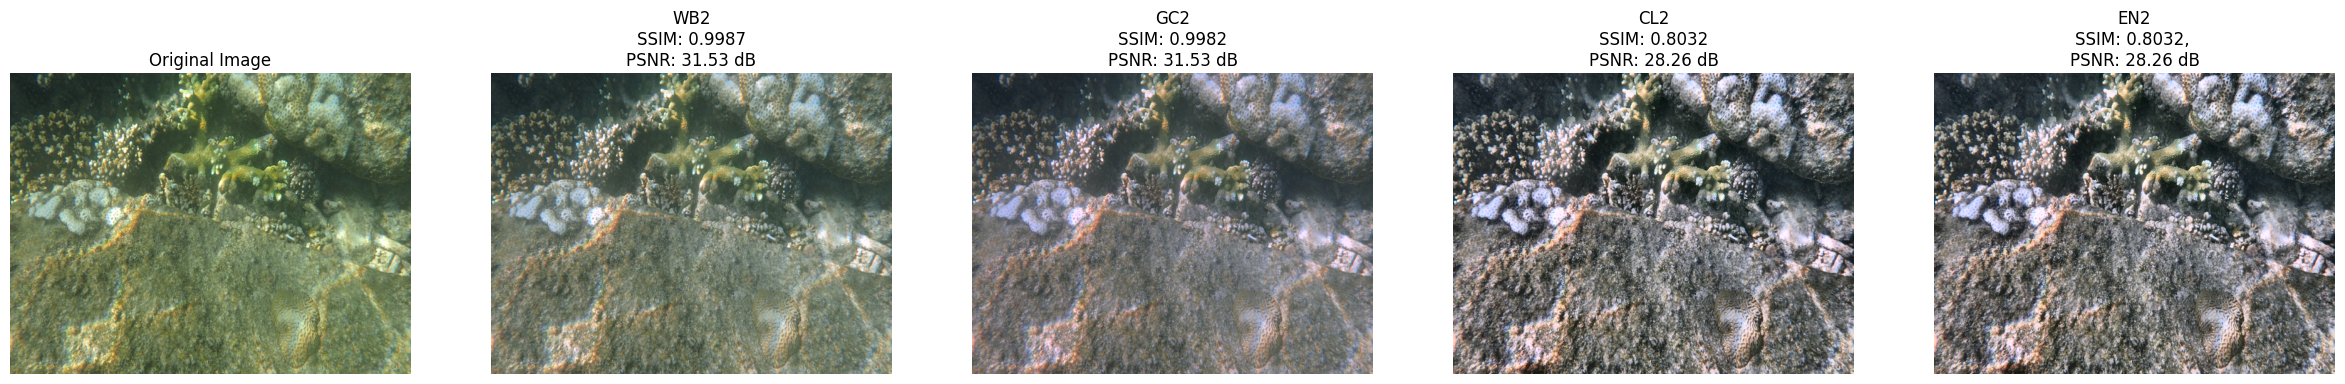

Results for 271_img_.png:
WB2 - SSIM: 0.9987, PSNR: 31.53 dB
GC2 - SSIM: 0.9982, PSNR: 31.53 dB
EN2 - SSIM: 0.8032, PSNR: 28.26 dB




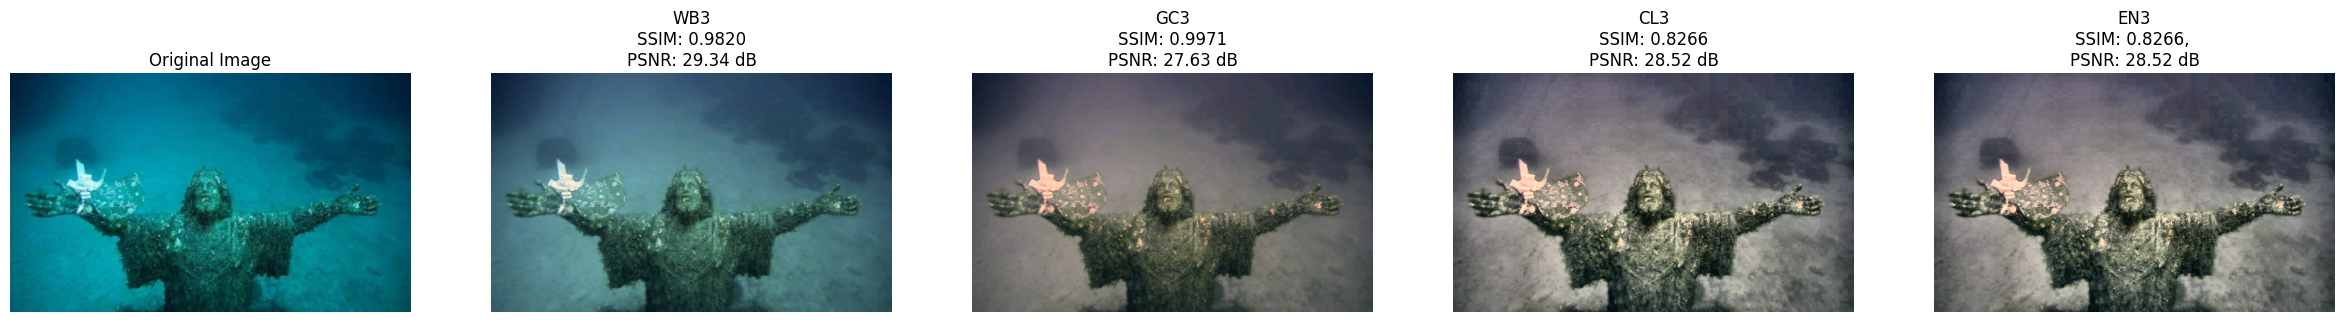

Results for 859_img_.png:
WB3 - SSIM: 0.9820, PSNR: 29.34 dB
GC3 - SSIM: 0.9971, PSNR: 27.63 dB
EN3 - SSIM: 0.8266, PSNR: 28.52 dB




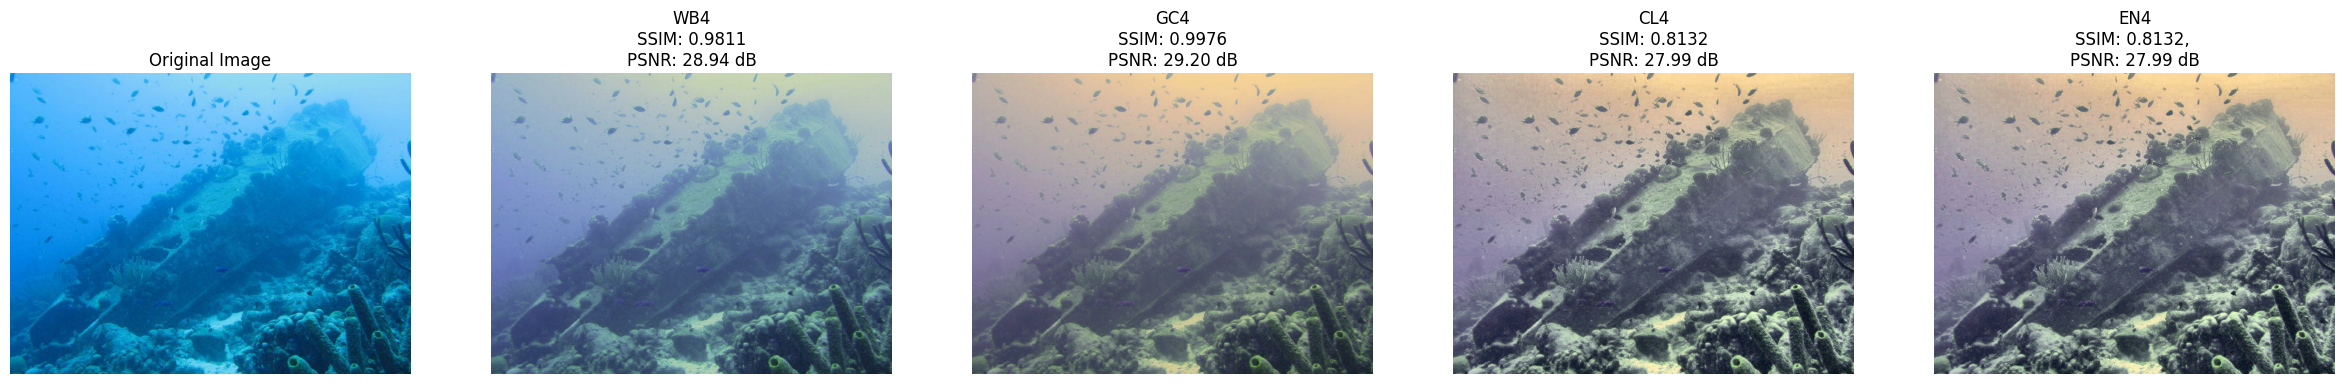

Results for 425_img_.png:
WB4 - SSIM: 0.9811, PSNR: 28.94 dB
GC4 - SSIM: 0.9976, PSNR: 29.20 dB
EN4 - SSIM: 0.8132, PSNR: 27.99 dB




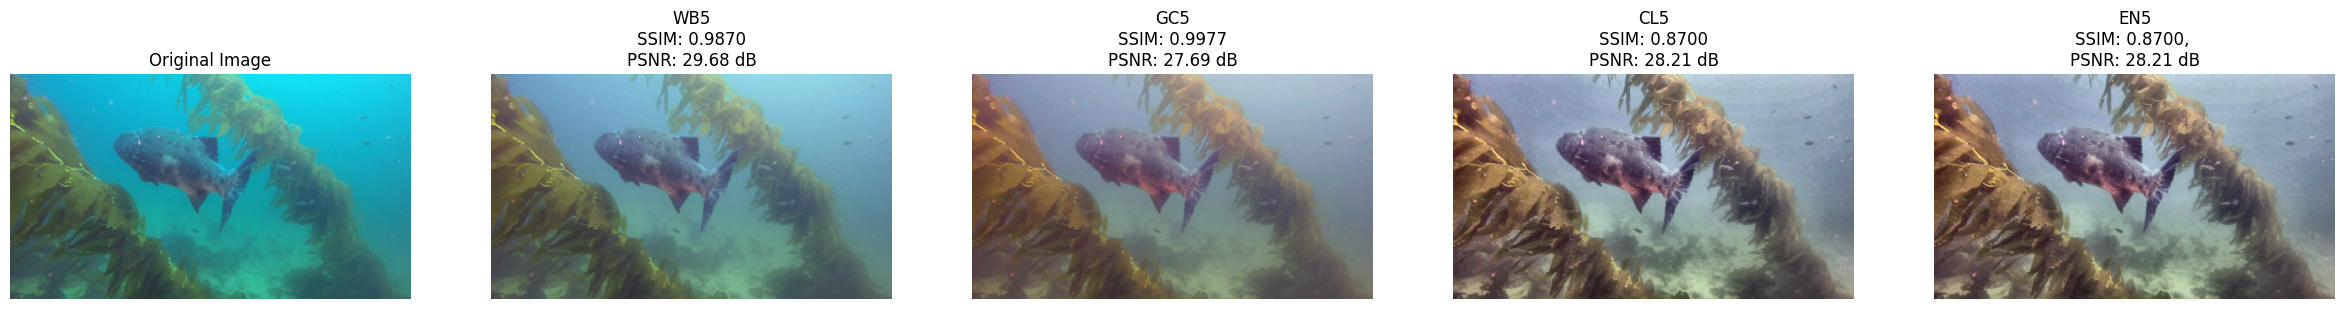

Results for 896_img_.png:
WB5 - SSIM: 0.9870, PSNR: 29.68 dB
GC5 - SSIM: 0.9977, PSNR: 27.69 dB
EN5 - SSIM: 0.8700, PSNR: 28.21 dB




In [7]:
# Loop through the 5 images and save into subfolders
for i, image_name in enumerate(images, 1):  # Use enumerate to track image number
    img_path = os.path.join(input_dir, image_name)
    raw_img = cv2.imread(img_path)
    
    # Apply the enhancements
    wb_img = apply_white_balance(raw_img)
    gc_img = apply_gray_world(wb_img)
    final_enhanced_img = apply_clahe(gc_img)
    
    # Save enhanced images into respective subfolders
    cv2.imwrite(os.path.join(output_dir, "wb_images", f"wb{i}.jpg"), wb_img)
    cv2.imwrite(os.path.join(output_dir, "gc_images", f"gc{i}.jpg"), gc_img)
    cv2.imwrite(os.path.join(output_dir, "clahe_images", f"cl{i}.jpg"), final_enhanced_img)
    cv2.imwrite(os.path.join(output_dir, "enhanced_images", f"en{i}.jpg"), final_enhanced_img)
    
    # Calculate SSIM and PSNR for each image
    wb_ssim = calculate_ssim(raw_img, wb_img)
    gc_ssim = calculate_ssim(wb_img, gc_img)
    final_ssim = calculate_ssim(raw_img, final_enhanced_img)
    
    wb_psnr = calculate_psnr(raw_img, wb_img)
    gc_psnr = calculate_psnr(wb_img, gc_img)
    final_psnr = calculate_psnr(raw_img, final_enhanced_img)
    
    # Plot original and enhanced images side by side
    plt.figure(figsize=(30, 10))
    
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 5, 2)
    plt.imshow(cv2.cvtColor(wb_img, cv2.COLOR_BGR2RGB))
    plt.title(f"WB{i}\nSSIM: {wb_ssim:.4f}\nPSNR: {wb_psnr:.2f} dB")
    plt.axis('off')
    
    plt.subplot(1, 5, 3)
    plt.imshow(cv2.cvtColor(gc_img, cv2.COLOR_BGR2RGB))
    plt.title(f"GC{i}\nSSIM: {gc_ssim:.4f}\nPSNR: {gc_psnr:.2f} dB")
    plt.axis('off')
    
    plt.subplot(1, 5, 4)
    plt.imshow(cv2.cvtColor(final_enhanced_img, cv2.COLOR_BGR2RGB))
    plt.title(f"CL{i}\nSSIM: {final_ssim:.4f}\nPSNR: {final_psnr:.2f} dB")
    plt.axis('off')
    
    plt.subplot(1, 5, 5)
    plt.imshow(cv2.cvtColor(final_enhanced_img, cv2.COLOR_BGR2RGB))  # Enhanced image
    plt.title(f"EN{i}\nSSIM: {final_ssim:.4f}, \nPSNR: {final_psnr:.2f} dB")
    plt.axis('off')
    
    plt.show()
    
    # Print the results for each image
    print(f"Results for {image_name}:")
    print(f"WB{i} - SSIM: {wb_ssim:.4f}, PSNR: {wb_psnr:.2f} dB")
    print(f"GC{i} - SSIM: {gc_ssim:.4f}, PSNR: {gc_psnr:.2f} dB")
    print(f"EN{i} - SSIM: {final_ssim:.4f}, PSNR: {final_psnr:.2f} dB")
    print("\n")